# Radial velocity of a star using its S1D spectre

The spectre of the star Tau Cet was obtained by ESA's ESPRESSO telescope. An array of lines with the biggest contrast for a G9 star filter was chosen and along with the previously refered spectre was used in ARES program to obtain the gaussian functions wich best suited each line. This way, the arrays ori_lambda and lambda_fit bellow refer to the wavelenghts obtained from the filter and the means of the gaussian functions provided by ARES, respectively.
First, we used 229 initial wavelenghts and then 595, 1030 and 3741. It is important to know that ARES may not find all of the given lines.

In [1]:
import numpy as np
from numpy import loadtxt
import scipy.constants as cnt
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (10 , 5)
#| the line "|" marks the start of a comment made by Francisco, which was placed there in hopes of making the code a bit more readable

## 229

In [ ]:
data = loadtxt('dados/1/test_229.ares' , float) # loads the file with the data | ARES result
lines = loadtxt('dados/lines_229.txt' , float) # loads the file with the line data | lambdas ref given to ARES
ori_lambda = lines[2:] # array with the reference values of the wavelength ! lambda ref
lambda_fit_229 = data[:,8] # an array with the fitted values of the wavelength | lambda obs
error = data[:,9] # an array with the error of the fitted values of the wavelength

In [4]:
print(len(lambda_fit_229))
print(len(ori_lambda))

224
229


| De facto, bastava só importar o ficheiro ares, pois a linha 0 deste já continha o conteúdo dos lambda de ref. Nope! Contêm os lambda ref correspondentes que o ARES encontrou!


ARES was given 229 lines to fit and found 224. The bellow code selects 224 lines to be used from the array ori_lambda, that can be found in the array lambda_ref . | Procura os lambda ref do ori_lambda que correspondem aos lambda ref do resultado do ARES


In [ ]:
# this lines identify the lines that should be used from the original line data
distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0]) # |corresponds to the original lambdarefs that ARES returned, to use the originals. 
#uses np.newaxis to turn ori_lambda in a column vector of size (229,1), subtracting by an array (224,0), which results in the matrix (229,224)
closest_indices = np.argmin(distances, axis=0) #| axis = 0 searched for the smaller index in each column, if it was one it would be in every line
#| in addition, np.argmin(list) gives the smallest number in the list
lambda_ref = ori_lambda[closest_indices] #| composing a list with a list of indexes returns a list with entries that correspond to those indexes

N_dim_229 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outliers
N_dim_229[0] = len(lambda_fit_229)

ARES makes a first estimate of the radial velocity and uses that value to make a correction to the spectre. The value of RV used by ARES was -16.600000 km/s. In this regard, we must take into consideration that the bellow RV is already corrected by that value.

In [6]:
RV = (lambda_fit_229 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_229 = error / lambda_ref *cnt.c #| obtida via prop. de incertezas considerando que lambda_ref e c não têm incerteza.

The bellow graphic shows the obtained values for the radial velocities. It is easy to notice the presence of some outliers. The mean ($\mu$), standard deviation ($\sigma$) and median of the values is also presented. Actually, the standard deviation is a large number, so the outliers were successivly removed until the standard deviation was adequate. All the values outside of $[\mu - \sigma , \mu + \sigma]$ were removed and new values for $\mu$, $\sigma$ and median were calculated. Weighted means and standard deviations were also calculated.

In [ ]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_229
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0) 

for i in range(2):
    wmean = (RV * pi * uncert_229 ** (-2)).sum() / (pi * uncert_229 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_229 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_229
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
# This method is described in Artigau et Al. (2022)
median = np.median(RV) # median of the values of the RVs

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV)))) #| mean and uncertainty
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd)) #| mean and weighted uncertainties
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

plt.errorbar(lambda_ref,RV,yerr=uncert_229,ecolor='black',fmt='.') #| fmt chooses the type of point
plt.ylabel('Radial Velocity (m/s)')
plt.xlabel('wavelenght (A)')
plt.show()

NameError: name 'RV' is not defined

Now we add the RV value calculated by ARES.

mean = -16723.47488 m/s ; standard deviation / √N = 49.47538 m/s
weighted mean = -16658.61159 m/s ; weighted standard deviation / √N = 1.81577 m/s
median = -16651.93254 m/s


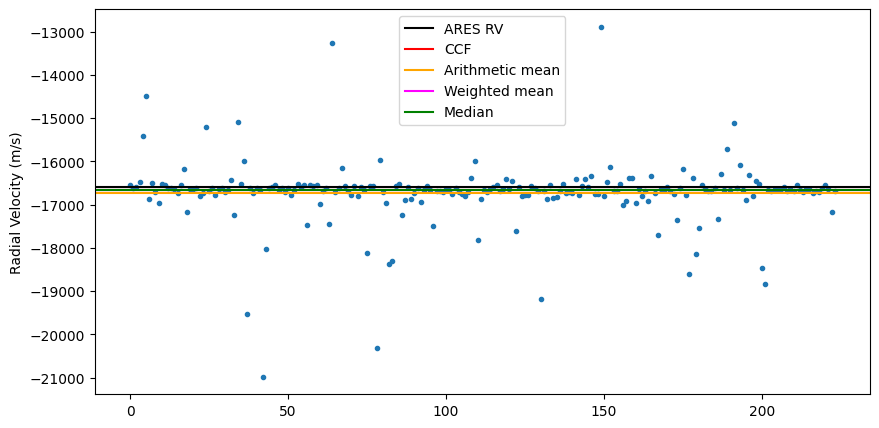

In [8]:
ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = -86.43457 m/s ; standard deviation / √N = 22.63419 m/s
weighted mean = -53.11090 m/s ; weighted standard deviation / √N = 1.88717 m/s
median = -51.17838 m/s


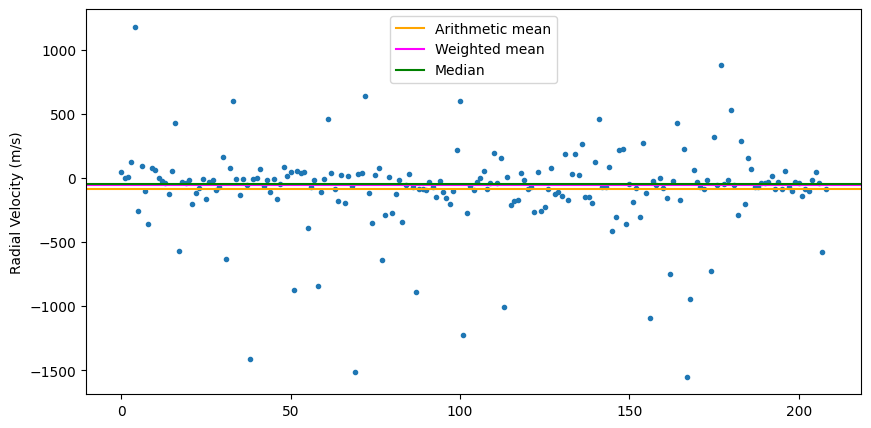

In [ ]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_229[i]) #|creates a list of values that are in the correct interval and their respective uncertainties
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0) 
    
corr_median = np.median(corrRV)

N_dim_229[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16686.43457 m/s ; standard deviation / √N = 22.63419 m/s
weighted mean = -16653.11090 m/s ; weighted standard deviation / √N = 1.88717 m/s
median = -16651.17838 m/s


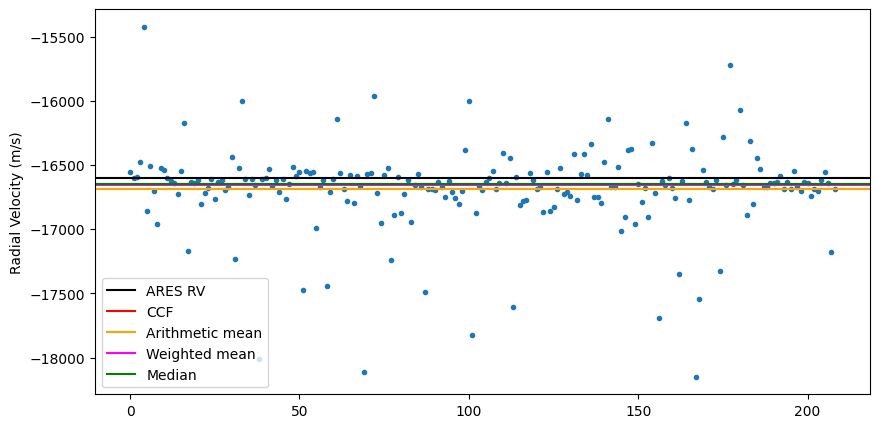

In [10]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = -51.15397 m/s ; standard deviation / √N = 12.76368 m/s
weighted mean = -52.47735 m/s ; weighted standard deviation / √N = 2.00717 m/s
median = -43.34339 m/s


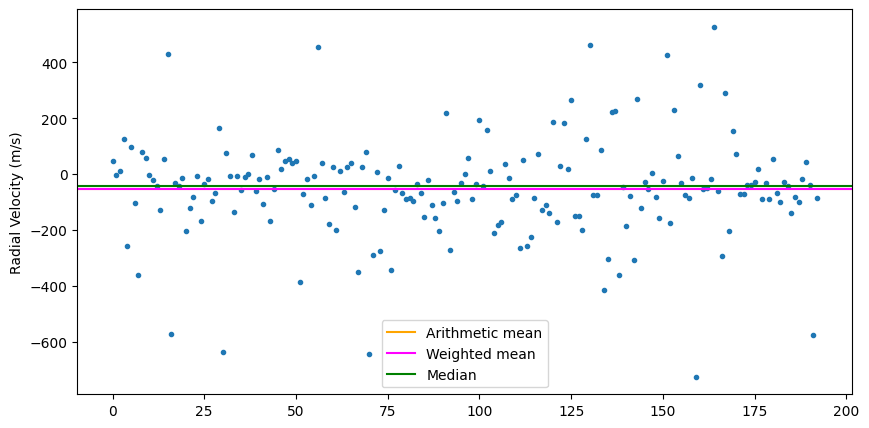

In [11]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_229 = corr2_mean
std_229 = corr2_std
wmean_229 = corr2_wmean
wstd_229 = corr2_wstd
median_229 = corr2_median

N_dim_229[2] = len(corr2RV)

STD_229 = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16651.15397 m/s ; standard deviation / √N = 12.76368 m/s
weighted mean = -16652.47735 m/s ; weighted standard deviation / √N = 2.00717 m/s
median = -16643.34339 m/s


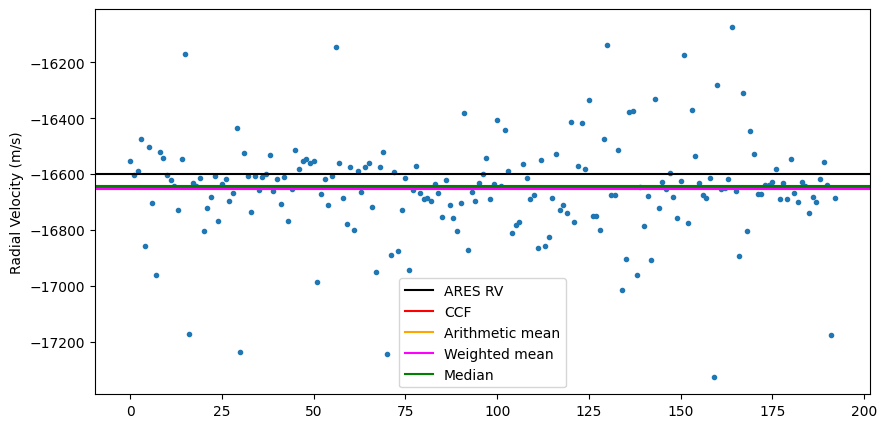

In [12]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

As we can see, while the median didn't change much, the mean did. The last two values of the mean and the median are actually close. If we use more wavelenghts the statistics can improve. We can also notice that the weighted mean does not appear to be very different from the arithmetic mean, but we should test it for larger samples.

## 595

In [13]:
data = loadtxt('dados/1/test_595.ares' , float) # loads the file with the data
lines = loadtxt('dados/lines_595.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength
lambda_fit_595 = data[:,8] # an array with the fitted values of the wavelength
error = data[:,9] # an array with the error of the fitted values of the wavelength

# this lines identify the lines that should be used from the original line data
distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0])
closest_indices = np.argmin(distances, axis=0)
lambda_ref = ori_lambda[closest_indices]

RV = (lambda_fit_595 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_595 = error / lambda_ref *cnt.c

ARES was given 595 and found 591. The analisis is similar to the previous wavelenght data.

mean = 148.24798 m/s ; standard deviation / √N = 51.30707 m/s
weighted mean = -19.43806 m/s ; weighted standard deviation / √N = 0.41693 m/s
median = -20.48172 m/s


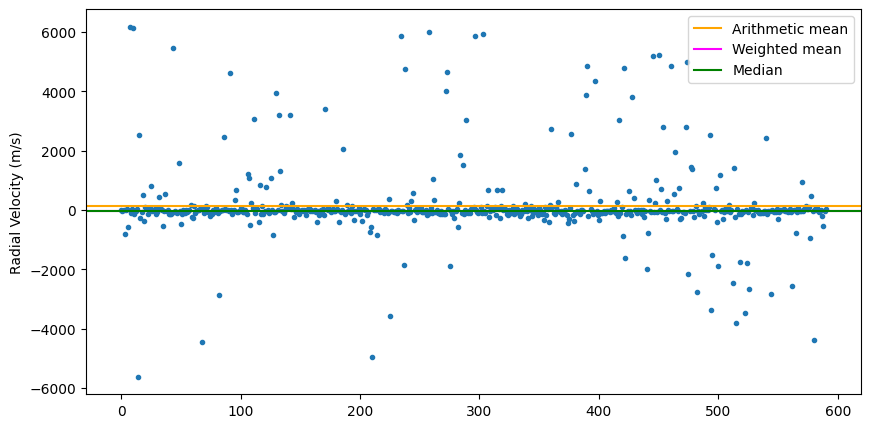

In [14]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_595
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_595 ** (-2)).sum() / (pi * uncert_595 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_595 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_595
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

N_dim_595 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outleirs
N_dim_595[0] = len(lambda_fit_595)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16451.75202 m/s ; standard deviation / √N = 51.30707 m/s
weighted mean = -16619.43806 m/s ; weighted standard deviation / √N = 0.41693 m/s
median = -16620.48172 m/s


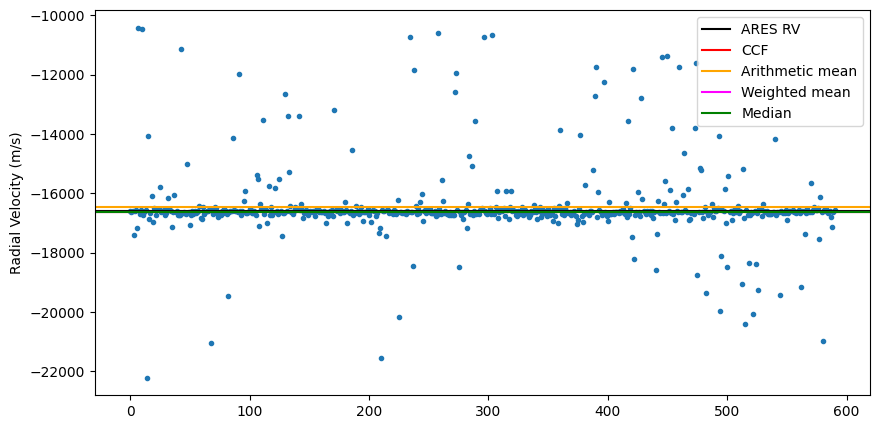

In [15]:
ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = 8.56511 m/s ; standard deviation / √N = 19.94252 m/s
weighted mean = -19.77334 m/s ; weighted standard deviation / √N = 0.43339 m/s
median = -23.80643 m/s


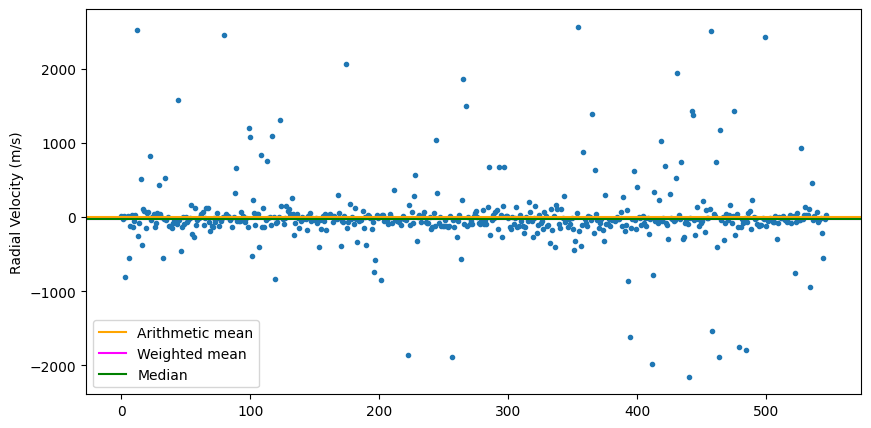

In [16]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_595[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_595[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16591.43489 m/s ; standard deviation / √N = 19.94252 m/s
weighted mean = -16619.77334 m/s ; weighted standard deviation / √N = 0.43339 m/s
median = -16623.80643 m/s


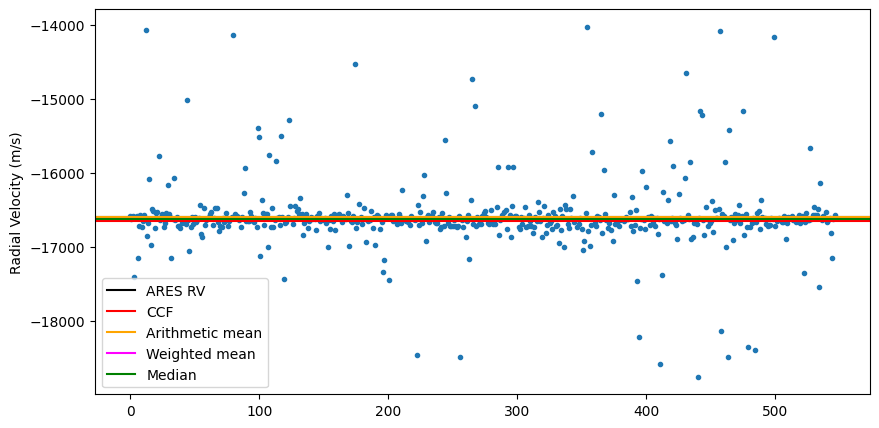

In [17]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = -25.11177 m/s ; standard deviation / √N = 9.29193 m/s
weighted mean = -21.98145 m/s ; weighted standard deviation / √N = 0.44680 m/s
median = -26.05382 m/s


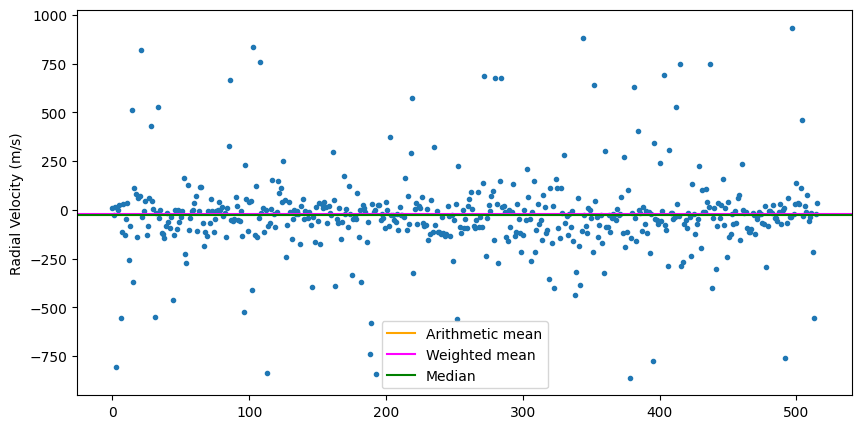

In [18]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_595 = corr2_mean
std_595 = corr2_std
wmean_595 = corr2_wmean
wstd_595 = corr2_wstd
median_595 = corr2_median

N_dim_595[2] = len(corr2RV)

STD_595 = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16625.11177 m/s ; standard deviation / √N = 9.29193 m/s
weighted mean = -16621.98145 m/s ; weighted standard deviation / √N = 0.44680 m/s
median = -16626.05382 m/s


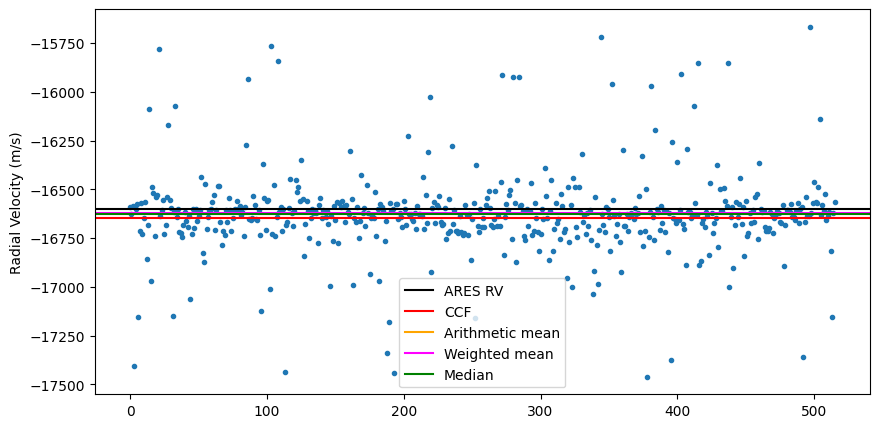

In [19]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## 1030

In [20]:
data = loadtxt('dados/1/test_1030.ares' , float) # loads the file with the data
lines = loadtxt('dados/lines_1030.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength
lambda_fit_1030 = data[:,8] # an array with the fitted values of the wavelength
error = data[:,9] # an array with the error of the fitted values of the wavelength

# this lines identify the lines that should be used from the original line data
distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0])
closest_indices = np.argmin(distances, axis=0)
lambda_ref = ori_lambda[closest_indices]

RV = (lambda_fit_1030 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_1030 = error / lambda_ref *cnt.c

ARES was given 1030 lines and found 1026.

mean = 176.32722 m/s ; standard deviation / √N = 36.31300 m/s
weighted mean = -14.20754 m/s ; weighted standard deviation / √N = 0.19759 m/s
median = -12.00805 m/s


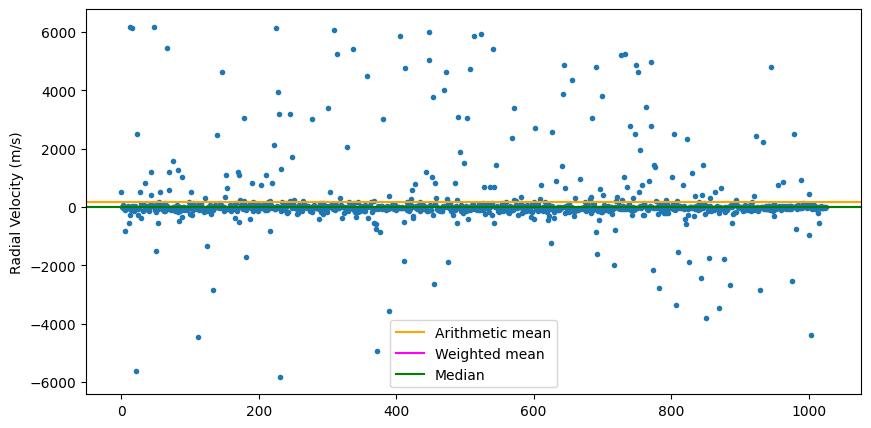

In [21]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_1030
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_1030 ** (-2)).sum() / (pi * uncert_1030 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_1030 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_1030
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

N_dim_1030 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outleirs
N_dim_1030[0] = len(lambda_fit_1030)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16423.67278 m/s ; standard deviation / √N = 36.31300 m/s
weighted mean = -16614.20754 m/s ; weighted standard deviation / √N = 0.19759 m/s
median = -16612.00805 m/s


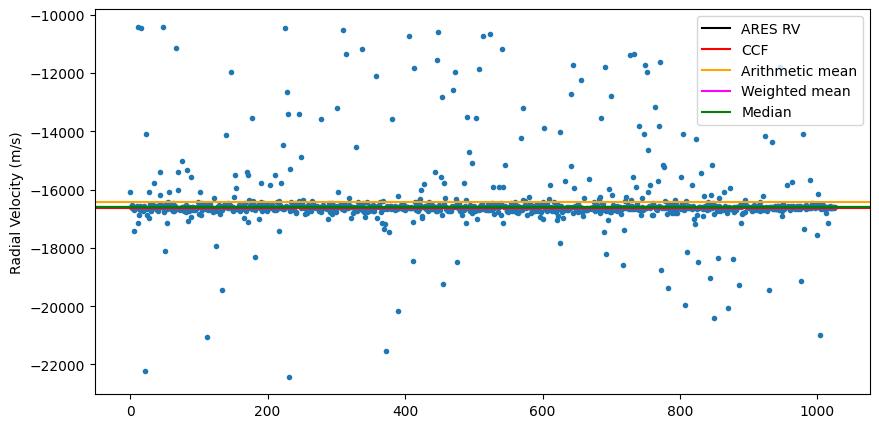

In [22]:
ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers:

mean = 24.09742 m/s ; standard deviation / √N = 13.38553 m/s
weighted mean = -14.55469 m/s ; weighted standard deviation / √N = 0.20438 m/s
median = -14.55153 m/s


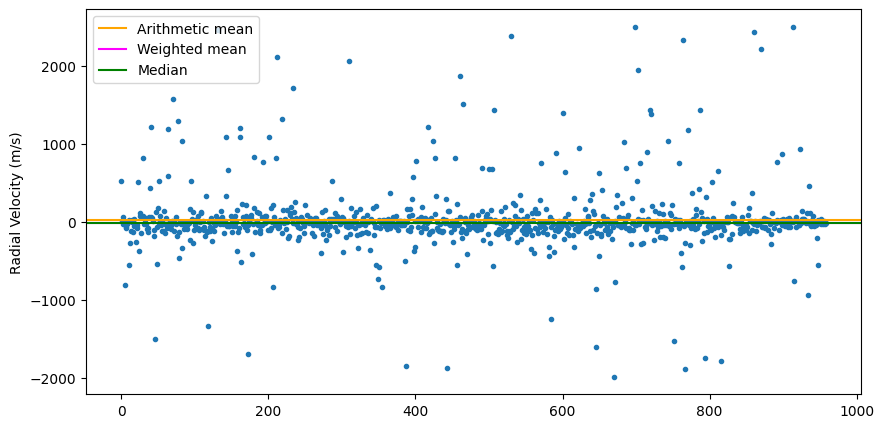

In [23]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_1030[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_1030[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16575.90258 m/s ; standard deviation / √N = 13.38553 m/s
weighted mean = -16614.55469 m/s ; weighted standard deviation / √N = 0.20438 m/s
median = -16614.55153 m/s


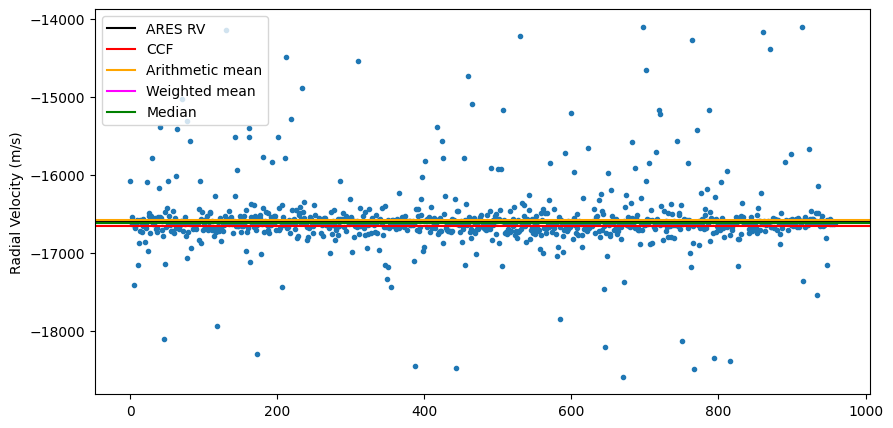

In [24]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

Removing outliers (2):

mean = -10.73907 m/s ; standard deviation / √N = 6.13800 m/s
weighted mean = -15.75027 m/s ; weighted standard deviation / √N = 0.21072 m/s
median = -17.17921 m/s


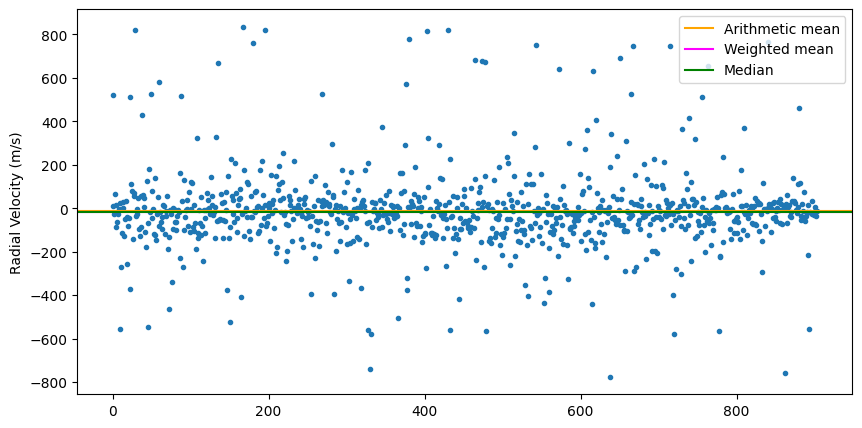

In [25]:
corr2RV = np.zeros(0)
corr2_uncert = np.zeros(0)

for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
    if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
        corr2RV = np.append(corr2RV,rv)
        corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
corr2_mean = np.mean(corr2RV)
corr2_std = np.std(corr2RV)

corr2_wmean = corr2_mean
corr2_wstd = 0
f0 = 2e-3
sigma = (corr2RV - corr2_wmean) / corr2_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
    corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
    sigma = (corr2RV - corr2_wmean) / corr2_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr2_median = np.median(corr2RV)

mean_1030 = corr2_mean
std_1030 = corr2_std
wmean_1030 = corr2_wmean
wstd_1030 = corr2_wstd
median_1030 = corr2_median

N_dim_1030[2] = len(corr2RV)

STD_1030 = np.array([std,corr_std,corr2_std])

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median))

plt.plot(corr2RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16610.73907 m/s ; standard deviation / √N = 6.13800 m/s
weighted mean = -16615.75027 m/s ; weighted standard deviation / √N = 0.21072 m/s
median = -16617.17921 m/s


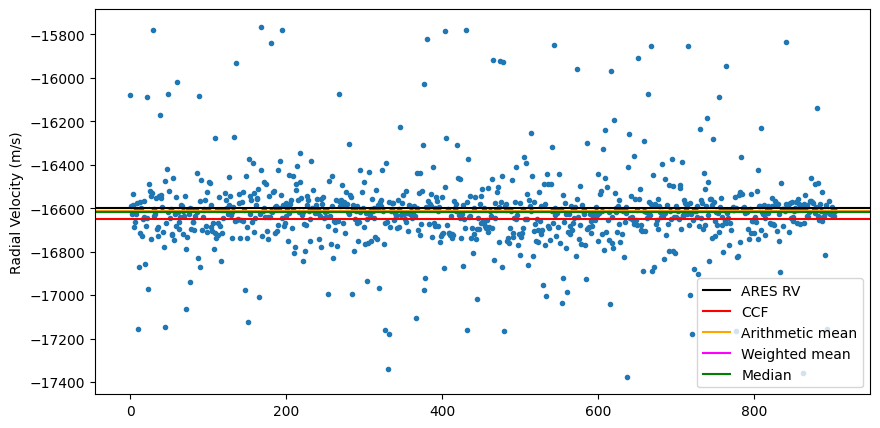

In [26]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## 3741

In [88]:
data = loadtxt('dados/1/test_3741.ares' , float) # loads the file with the data
lines = loadtxt('dados/lines_3741.txt' , float) # loads the file with the line data
ori_lambda = lines[2:] # array with the reference values of the wavelength
lambda_fit_3741 = data[:,8] # an array with the fitted values of the wavelength
error = data[:,9] # an array with the error of the fitted values of the wavelength

# this lines identify the lines that should be used from the original line data
distances = np.abs(ori_lambda[:, np.newaxis] - data[:,0])
closest_indices = np.argmin(distances, axis=0)
lambda_ref = ori_lambda[closest_indices]

RV = (lambda_fit_3741 - lambda_ref) / lambda_ref * cnt.c # RV calculation
uncert_3741 = error / lambda_ref *cnt.c

ARES was given 3741 lines and found 3184.

mean = 176.40781 m/s ; standard deviation / √N = 22.14124 m/s
weighted mean = 38.40021 m/s ; weighted standard deviation / √N = 0.03629 m/s
median = -2.96657 m/s


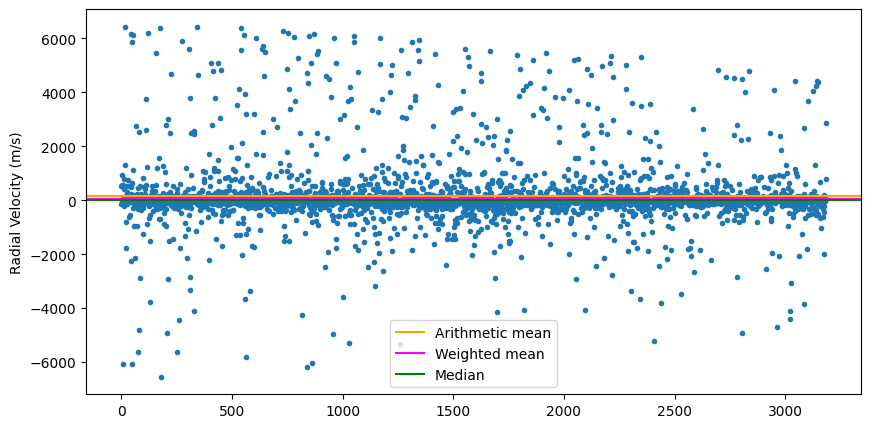

In [89]:
std = np.std(RV) # standard deviation of the values of the RVs
mean = np.mean(RV) # mean of the values of the RVs

wmean = mean
wstd = 0
f0 = 2e-3
sigma = (RV - wmean) / uncert_3741
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    wmean = (RV * pi * uncert_3741 ** (-2)).sum() / (pi * uncert_3741 ** (-2)).sum()
    wstd = np.sqrt(1 / (pi * uncert_3741 ** (-2)).sum())
    sigma = (RV - wmean) / uncert_3741
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
median = np.median(RV) # median of the values of the RVs

N_dim_3741 = np.zeros(3,dtype=int) # array to store the number of lines in the beguining and after removing outleirs
N_dim_3741[0] = len(lambda_fit_3741)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median))

plt.plot(RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16423.59219 m/s ; standard deviation / √N = 22.14124 m/s
weighted mean = -16561.59979 m/s ; weighted standard deviation / √N = 0.03629 m/s
median = -16602.96657 m/s


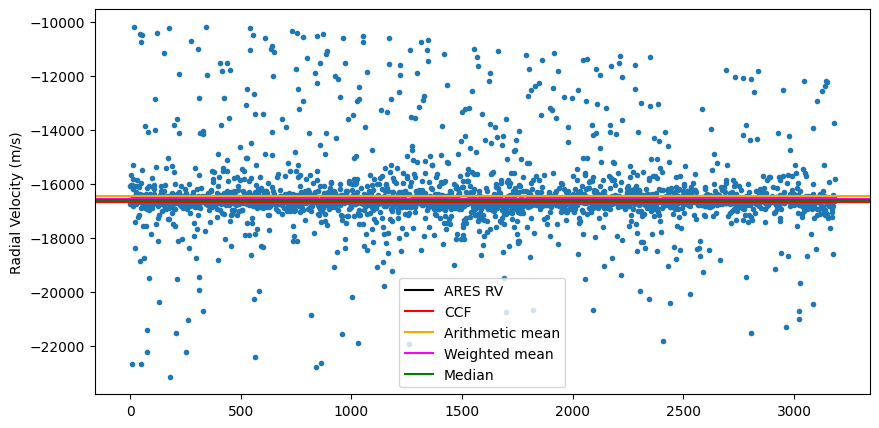

In [90]:
ARES_RV = -16600

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(mean + ARES_RV,std / np.sqrt(len(RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(wmean + ARES_RV,wstd / np.sqrt(len(RV))))
print('median = {:.5f} m/s'.format(median + ARES_RV))

plt.plot(RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

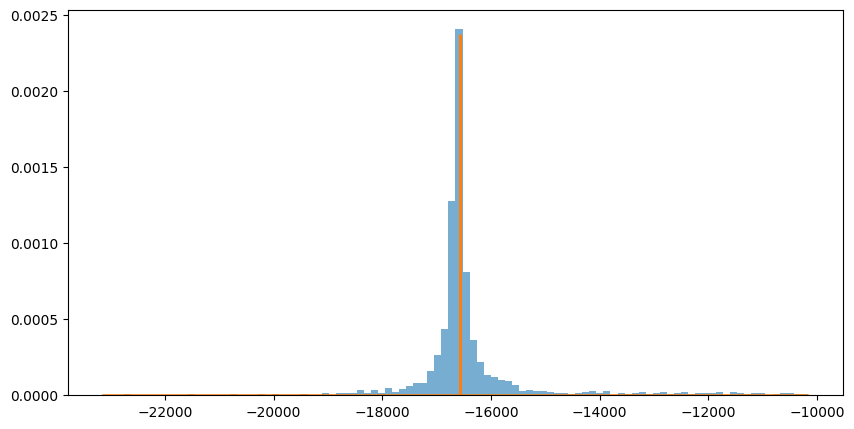

In [91]:
RadVel = RV + ARES_RV
max = np.max(RadVel)
min = np.min(RadVel)

x = np.arange(min, max, 1)
y =0.0014*(1/(wstd)*2*np.sqrt(np.pi) )*np.exp(-0.5*((x-(wmean+ARES_RV))**2)/wstd) #Multipliquei por uma constante para se poder ver
plt.hist(RadVel, bins=100, density=True, alpha=0.6)
plt.plot(x,y)


Removing outliers:

mean = 20.90031 m/s ; standard deviation / √N = 10.03203 m/s
weighted mean = 3.46962 m/s ; weighted standard deviation / √N = 0.03677 m/s
median = -8.02915 m/s


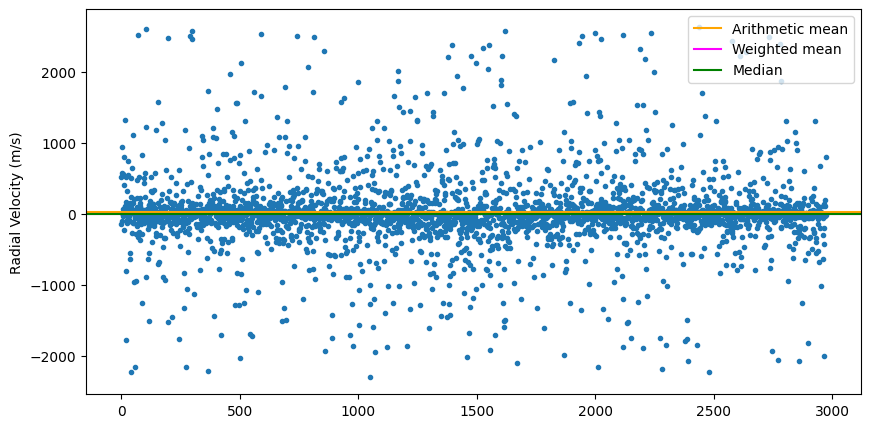

In [92]:
corrRV = np.zeros(0)
corr_uncert = np.zeros(0)

for i , rv in enumerate(RV): # this cycle chooses the values between the mean and standard deviation
    if mean - 2*std < rv < mean + 2*std:
        corrRV = np.append(corrRV,rv)
        corr_uncert = np.append(corr_uncert,uncert_3741[i])
        
corr_mean = np.mean(corrRV)
corr_std = np.std(corrRV)

corr_wmean = corr_mean
corr_wstd = 0
f0 = 2e-3
sigma = (corrRV - corr_wmean) / corr_uncert
pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

for i in range(2):
    corr_wmean = (corrRV * pi * corr_uncert ** (-2)).sum() / (pi * corr_uncert ** (-2)).sum()
    corr_wstd = np.sqrt(1 / (pi * corr_uncert ** (-2)).sum())
    sigma = (corrRV - corr_wmean) / corr_uncert
    pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
corr_median = np.median(corrRV)

N_dim_3741[1] = len(corrRV)

print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median))

plt.plot(corrRV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(corr_mean, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median, label= 'Median', color ='green')
plt.legend()
plt.show()

mean = -16579.09969 m/s ; standard deviation / √N = 10.03203 m/s
weighted mean = -16596.53038 m/s ; weighted standard deviation / √N = 0.03677 m/s
median = -16608.02915 m/s


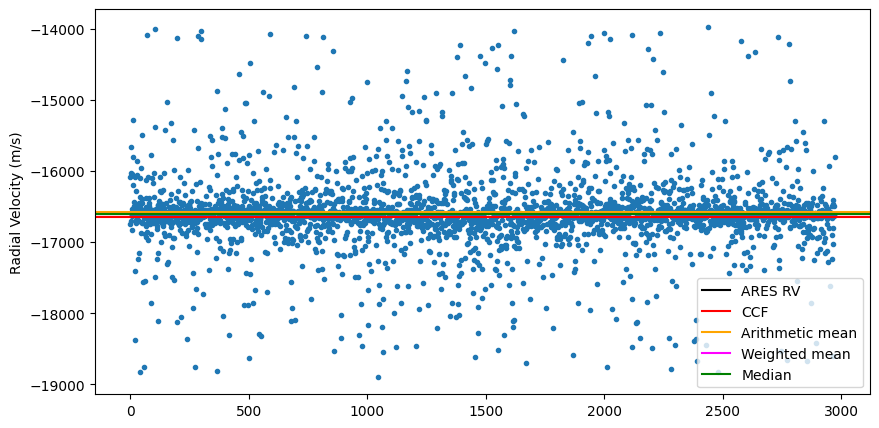

In [93]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr_mean + ARES_RV,corr_std / np.sqrt(len(corrRV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr_wmean + ARES_RV,corr_wstd / np.sqrt(len(corrRV))))
print('median = {:.5f} m/s'.format(corr_median + ARES_RV))

plt.plot(corrRV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

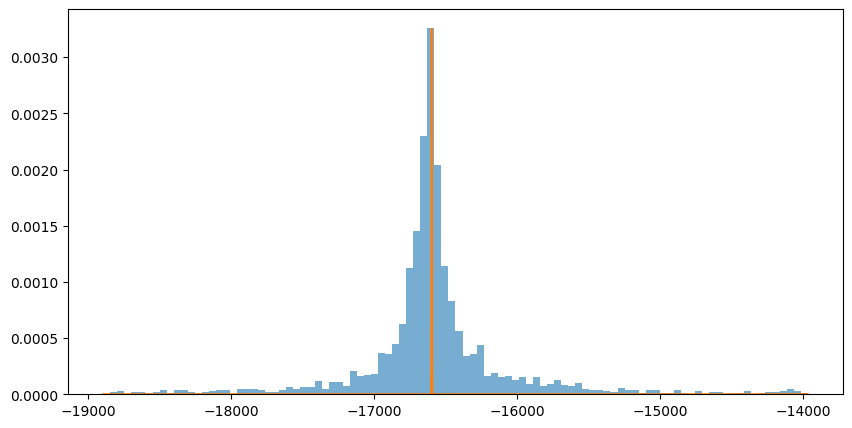

In [102]:
RadVel = corrRV + ARES_RV
max = np.max(RadVel)
min = np.min(RadVel)

x = np.arange(min, max, 1)
y =0.00188*(1/(corr_wstd)*2*np.sqrt(np.pi) )*np.exp(-0.5*((x-(corr_wmean+ARES_RV))**2)/corr_wstd) #Multipliquei por uma constante para se poder ver
plt.hist(RadVel, bins=100, density=True, alpha=0.6)
plt.plot(x,y)


Removing outliers (2):

In [33]:
# corr2RV = np.zeros(0) 
# corr2_uncert = np.zeros(0) 

# for i , rv in enumerate(corrRV): # this cycle chooses the values between the mean and standard deviation
#     if corr_mean - 2*corr_std < rv < corr_mean + 2*corr_std:
#         corr2RV = np.append(corr2RV,rv)
#         corr2_uncert = np.append(corr2_uncert,corr_uncert[i])
        
# corr2_mean = np.mean(corr2RV)
# corr2_std = np.std(corr2RV)

# corr2_wmean = corr2_mean
# corr2_wstd = 0
# f0 = 2e-3
# sigma = (corr2RV - corr2_wmean) / corr2_uncert
# pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)

# for i in range(2):
#     corr2_wmean = (corr2RV * pi * corr2_uncert ** (-2)).sum() / (pi * corr2_uncert ** (-2)).sum()
#     corr2_wstd = np.sqrt(1 / (pi * corr2_uncert ** (-2)).sum())
#     sigma = (corr2RV - corr2_wmean) / corr2_uncert
#     pi = ((1 - f0) * np.exp(-sigma ** 2 / 2)) / ((1 - f0) * np.exp(-sigma ** 2 / 2) + f0)
    
# corr2_median = np.median(corr2RV)

# mean_3741 = corr2_mean
# std_3741 = corr2_std
# wmean_3741 = corr2_wmean
# wstd_3741 = corr2_wstd
# median_3741 = corr2_median

# N_dim_3741[2] = len(corr2RV)

# STD_3741 = np.array([std,corr_std,corr2_std])

# print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean,corr2_std / np.sqrt(len(corr2RV))))
# print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean,corr2_wstd / np.sqrt(len(corr2RV))))
# print('median = {:.5f} m/s'.format(corr2_median))

# plt.plot(corr2RV,'.')
# plt.ylabel('Radial Velocity (m/s)')
# plt.axhline(corr2_mean, label= 'Arithmetic mean', color ='orange')
# plt.axhline(corr2_wmean, label= 'Weighted mean', color ='magenta')
# plt.axhline(corr2_median, label= 'Median', color ='green')
# plt.legend()
# plt.show()

mean = -16610.73907 m/s ; standard deviation / √N = 6.13800 m/s
weighted mean = -16615.75027 m/s ; weighted standard deviation / √N = 0.21072 m/s
median = -16617.17921 m/s


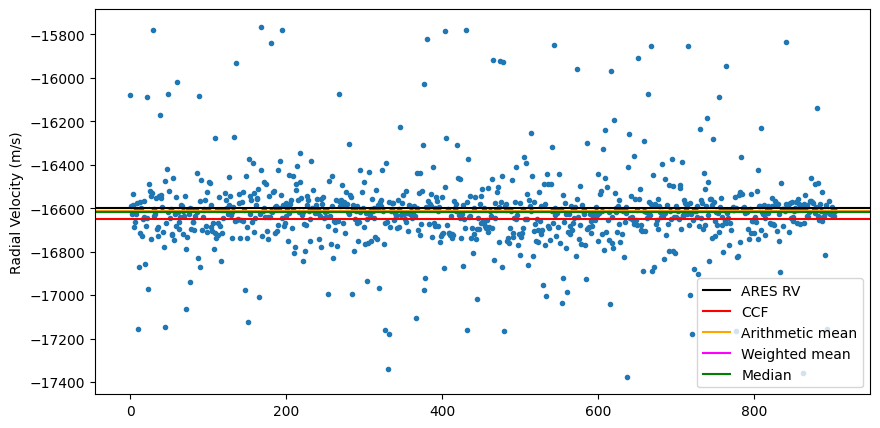

In [34]:
print('mean = {:.5f} m/s ; standard deviation / \u221AN = {:.5f} m/s'.format(corr2_mean + ARES_RV,corr2_std / np.sqrt(len(corr2RV))))
print('weighted mean = {:.5f} m/s ; weighted standard deviation / \u221AN = {:.5f} m/s'.format(corr2_wmean + ARES_RV,corr2_wstd / np.sqrt(len(corr2RV))))
print('median = {:.5f} m/s'.format(corr2_median + ARES_RV))

plt.plot(corr2RV + ARES_RV,'.')
plt.ylabel('Radial Velocity (m/s)')
plt.axhline(ARES_RV, label= 'ARES RV', color ='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.axhline(corr2_mean + ARES_RV, label= 'Arithmetic mean', color ='orange')
plt.axhline(corr2_wmean + ARES_RV, label= 'Weighted mean', color ='magenta')
plt.axhline(corr2_median + ARES_RV, label= 'Median', color ='green')
plt.legend()
plt.show()

## Mean RV for a diferent number of initial wavelegnhts

Now that we have the mean RV values for each number of initial wavelenghts (229,595,1030,3741) we can make a graphic comparing this values. We used the last values calculated (in Removing outliers (2)).

In [35]:
Means = np.array([mean_229,mean_595,mean_1030,mean_3741])
Std = np.array([std_229,std_595,std_1030,std_3741])
Wmeans = np.array([wmean_229,wmean_595,wmean_1030,wmean_3741])
Wstd = np.array([wstd_229,wstd_595,wstd_1030,wstd_3741])
Medians = np.array([median_229,median_595,median_1030,median_3741])
#| Em baixo temos a incerteza de média
Std_root = np.array([std_229 / np.sqrt(N_dim_229[2]),std_595 / np.sqrt(N_dim_595[2]),std_1030 / np.sqrt(N_dim_1030[2]),std_3741 / np.sqrt(N_dim_3741[2])])
Wstd_root = np.array([wstd_229 / np.sqrt(N_dim_229[2]),wstd_595 / np.sqrt(N_dim_595[2]),wstd_1030 / np.sqrt(N_dim_1030[2]),wstd_3741 / np.sqrt(N_dim_3741[2])])
#| Em cima temos a incerteza da média pesada
N_wave = np.array([229,595,1030,3741])

#plt.errorbar(N_wave,Means,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Mean and median comparison')
plt.show()

#plt.errorbar(N_wave,Wmeans,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans,yerr=Wstd_root,ecolor='orange',fmt='.',label='Weighted mean')
plt.plot(N_wave,Medians,'o',label='Median',color='green')
plt.legend()
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.title('Weighted mean and median comparison')
plt.show()

NameError: name 'mean_3741' is not defined

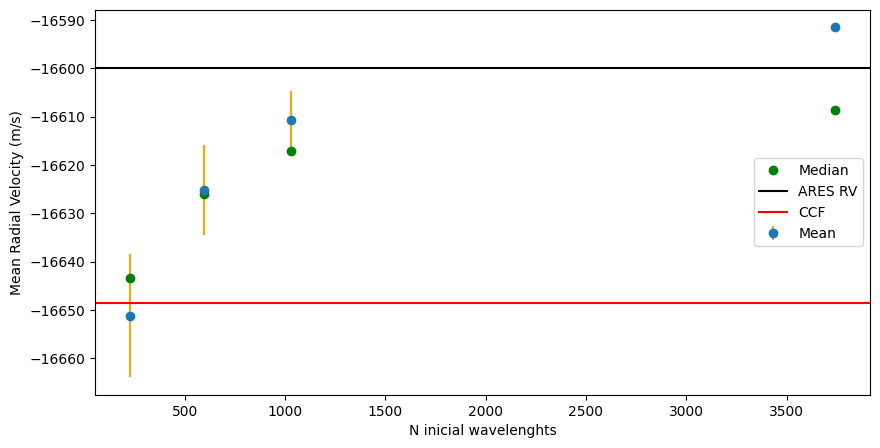

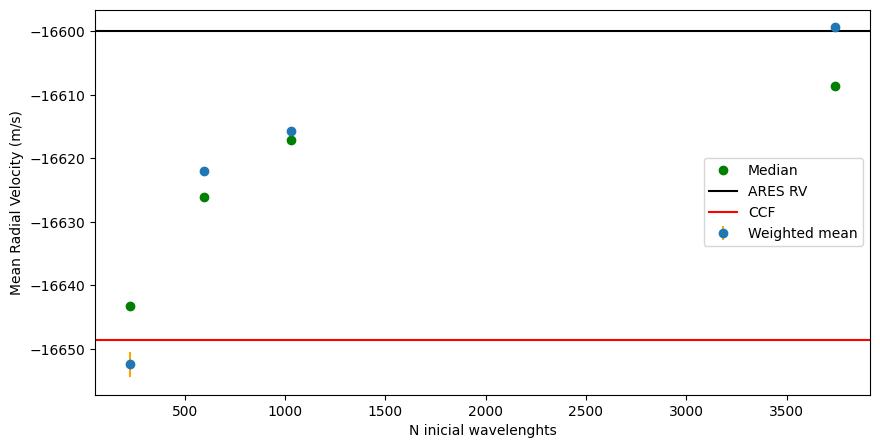

In [ ]:
#plt.errorbar(N_wave,Means+ARES_RV,yerr=Std,ecolor='blue',fmt='o',label='Mean')
plt.errorbar(N_wave,Means+ARES_RV,yerr=Std_root,ecolor='orange',fmt='o',label='Mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.axhline(-16600,label='ARES RV',color='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.legend()
plt.show()

#plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd,ecolor='blue',fmt='o',label='Weighted mean')
plt.errorbar(N_wave,Wmeans+ARES_RV,yerr=Wstd_root,ecolor='orange',fmt='o',label='Weighted mean')
plt.plot(N_wave,Medians+ARES_RV,'o',label='Median',color='green')
plt.ylabel('Mean Radial Velocity (m/s)')
plt.xlabel('N inicial wavelenghts')
plt.axhline(-16600,label='ARES RV',color='black')
plt.axhline(-16648.63, label= 'CCF', color ='red')
plt.legend()
plt.show()

From the previous graphic we can notice that the higher the number of initial wavelenghts, the closest the statistics are to the RV calculated by ARES. Besides that, the arithmetic mean and weighted mean do not apper to change much even for the largest number of initial wavelenghts.

We were also to represent both $\sigma$ and $\frac{\sigma}{\sqrt{N}}$, but $\sigma$ was much bigger and would not make the other value visible. Another interesting observation is that even divided by the square root of the total number of lines, the standard deviation |(não é a standard deviation, mas sim a incerteza da média)|is lower for higher values of N, but not as lower as someone could expect. To try to find some explanation for this observation and see if it also happened before removing the outliers I created the following table.

In [ ]:
data = {
    'N ref lines':[229,595,1030,3741],
    'initial σ':[STD_229[0],STD_595[0],STD_1030[0],STD_3741[0]],
    'initial σ/ \u221A N':[STD_229[0]/np.sqrt(N_dim_229[0]),STD_595[0]/np.sqrt(N_dim_595[0]),STD_1030[0]/np.sqrt(N_dim_1030[0]),STD_3741[0]/np.sqrt(N_dim_3741[0])],
    '1st σ':[STD_229[1],STD_595[1],STD_1030[1],STD_3741[1]],
    '1st σ/ \u221A N':[STD_229[1]/np.sqrt(N_dim_229[1]),STD_595[1]/np.sqrt(N_dim_595[1]),STD_1030[1]/np.sqrt(N_dim_1030[1]),STD_3741[1]/np.sqrt(N_dim_3741[1])],
    '2nd σ':[STD_229[2],STD_595[2],STD_1030[2],STD_3741[2]],
    '2nd σ/ \u221A N':[STD_229[2]/np.sqrt(N_dim_229[2]),STD_595[2]/np.sqrt(N_dim_595[2]),STD_1030[2]/np.sqrt(N_dim_1030[2]),STD_3741[2]/np.sqrt(N_dim_3741[2])]
}

# Create a DataFrame (table) from the data
df = pd.DataFrame(data)

# Display the table
print(df)

   N ref lines    initial σ  initial σ/ √ N       1st σ  1st σ/ √ N  \
0          229   740.479660       49.475378  327.218638   22.634186   
1          595  1247.300171       51.307073  466.416170   19.942515   
2         1030  1163.150208       36.312999  414.519372   13.385529   
3         3741  1249.362522       22.141240  547.090731   10.032031   

        2nd σ  2nd σ/ √ N  
0  177.318737   12.763682  
1  211.072133    9.291933  
2  184.548758    6.138000  
3  315.158576         inf  


/tmp/ipykernel_1222/2967507921.py:8: RuntimeWarning: divide by zero encountered in scalar divide
  '2nd σ/ \u221A N':[STD_229[2]/np.sqrt(N_dim_229[2]),STD_595[2]/np.sqrt(N_dim_595[2]),STD_1030[2]/np.sqrt(N_dim_1030[2]),STD_3741[2]/np.sqrt(N_dim_3741[2])]


As we can see, $\sigma$ does not change much even for higher N values, but the square root also does not increase very much (for example, $\sqrt{3000} \approx 55$ and $\sqrt{1000} \approx 32$). This way, the results look adequate.

## Percentage of wavelenght decrease

To understand how much the number of wavelenghts/radial velocities decreases with each outliers removal, the following graphic was made.

   N ref lines  N fitted lines  1st removal      1st %  2nd removal      2nd %
0          229             224          209  93.303571          193  86.160714
1          595             591          547  92.554992          516  87.309645
2         1030            1026          959  93.469786          904  88.109162
3         3741            3184         2974  93.404523            0   0.000000


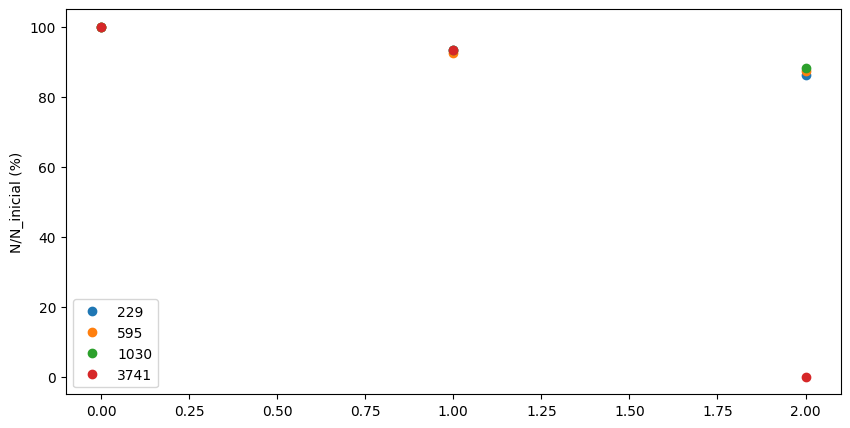

In [ ]:
data = {
    'N ref lines':[229,595,1030,3741],
    'N fitted lines':[N_dim_229[0],N_dim_595[0],N_dim_1030[0],N_dim_3741[0]],
    '1st removal':[N_dim_229[1],N_dim_595[1],N_dim_1030[1],N_dim_3741[1]],
    '1st %':[N_dim_229[1]/N_dim_229[0]*100,N_dim_595[1]/N_dim_595[0]*100,N_dim_1030[1]/N_dim_1030[0]*100,N_dim_3741[1]/N_dim_3741[0]*100],
    '2nd removal':[N_dim_229[2],N_dim_595[2],N_dim_1030[2],N_dim_3741[2]],
    '2nd %':[N_dim_229[2]/N_dim_229[0]*100,N_dim_595[2]/N_dim_595[0]*100,N_dim_1030[2]/N_dim_1030[0]*100,N_dim_3741[2]/N_dim_3741[0]*100]
}

# Create a DataFrame (table) from the data
df = pd.DataFrame(data)

# Display the table
print(df)

N_dim_229_per = np.array([1,N_dim_229[1] / N_dim_229[0],N_dim_229[2] / N_dim_229[0]])*100
N_dim_595_per = np.array([1,N_dim_595[1] / N_dim_595[0],N_dim_595[2] / N_dim_595[0]])*100
N_dim_1030_per = np.array([1,N_dim_1030[1] / N_dim_1030[0],N_dim_1030[2] / N_dim_1030[0]])*100
N_dim_3741_per = np.array([1,N_dim_3741[1] / N_dim_3741[0],N_dim_3741[2] / N_dim_3741[0]])*100


plt.plot(N_dim_229_per,'o',label='229')
plt.plot(N_dim_595_per,'o',label='595')
plt.plot(N_dim_1030_per,'o',label='1030')
plt.plot(N_dim_3741_per,'o',label='3741')
plt.legend()
#plt.title('Decrease in the number of lines after each outliers removal (%)')
plt.ylabel('N/N_inicial (%)')
plt.show()

I would expect the lower final percentage to be the one related to 3741, because it is when all lines (without a contrast threshold) are taken into account. As there is much more weaker lines than for previous computations I thought that maybe ARES would fit this lines with a larger error, therefore it is a surprise that the lowest percentage occurs for N=229 because it is the one which lines had the larger contrast threshold.

## Histograms of the error

Alternativamente, em vez de fazer o que está feito abaixo, para ter um histograma normalizado bastava se fazer :

plt.hist(array, density=True, label='229')

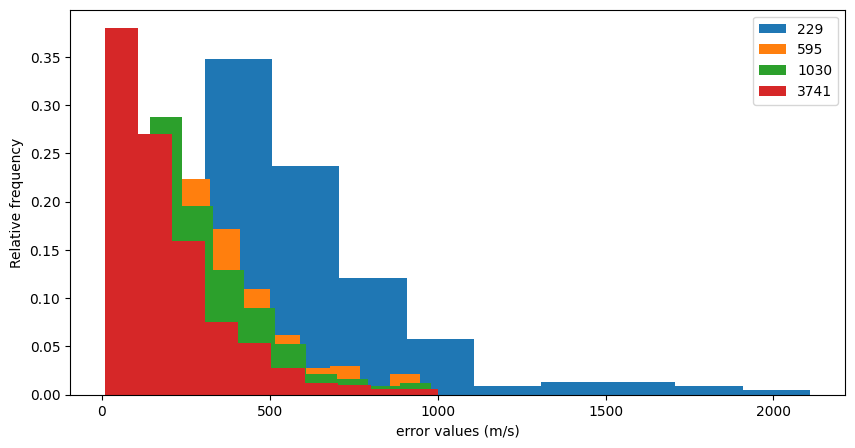

In [ ]:
plt.hist(uncert_229,weights=np.zeros_like(uncert_229) + 1. / len(uncert_229),label='229') #| Só estamos a adicionar a cada entrada dos pesos 1/len(229)
#| Weights multiplica cada valor do array por 1/229 para normalizar o histograma!
new_uncert_595 = [x for x in uncert_595 if x < 1e3]
plt.hist(new_uncert_595,weights=np.zeros_like(new_uncert_595) + 1. / len(new_uncert_595),label='595')

new_uncert_1030 = [x for x in uncert_1030 if x < 1e3]
plt.hist(new_uncert_1030,weights=np.zeros_like(new_uncert_1030) + 1. / len(new_uncert_1030),label='1030')

new_uncert_3741 = [x for x in uncert_3741 if x < 1e3]
plt.hist(new_uncert_3741,weights=np.zeros_like(new_uncert_3741) + 1. / len(new_uncert_3741),label='3741')

#plt.title('Relative frequency of the errors')
plt.xlabel('error values (m/s)')
plt.ylabel('Relative frequency')
plt.legend()
plt.show()

## Uncertainty as a function of wavelenght

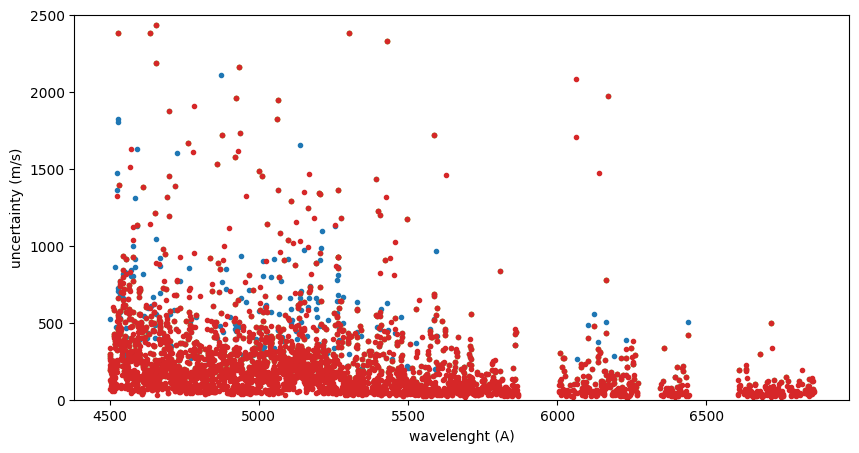

In [ ]:
plt.plot(lambda_fit_229,uncert_229,'.')
plt.plot(lambda_fit_595,uncert_595,'.')
plt.plot(lambda_fit_1030,uncert_1030,'.')
plt.plot(lambda_fit_3741,uncert_3741,'.')
plt.ylim(0,2500)
plt.xlabel('wavelenght (A)')
plt.ylabel('uncertainty (m/s)')
plt.show()